# Packages and Libraries

In [2]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from PIL import Image
!pip install keras tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install opencv-python
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg

#MUSIC PROCESS
!pip install pydub
import pydub
from scipy.io.wavfile import read, write
!pip install librosa
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
import pickle

#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder

#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

#MODEL LAYERS
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras

#SKLEARN CLASSIFIER
!pip install xgboost
from xgboost import XGBClassifier, XGBRegressor
!pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
!pip install catboost
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\esther\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Path, Label, Tranformation

### Main

In [5]:
Main_WAV_Path = Path("C:/Users/esther/OneDrive - Tunku Abdul Rahman University College/FYP/Project II/TESS Toronto emotional speech set data")

### Wav Path

In [7]:
Wav_Path = list(Main_WAV_Path.glob(r"**/*.wav"))

### Wav Labels

In [9]:
Wav_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Wav_Path))

### To Series

In [11]:
Wav_Path_Series = pd.Series(Wav_Path,name="WAV").astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels,name="EMOTION")

### To Dataframe

In [13]:
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series],axis=1)

In [14]:
print(Main_Wav_Data.head(-1))

                                                    WAV    EMOTION
0     C:\Users\esther\OneDrive - Tunku Abdul Rahman ...  OAF_angry
1     C:\Users\esther\OneDrive - Tunku Abdul Rahman ...  OAF_angry
2     C:\Users\esther\OneDrive - Tunku Abdul Rahman ...  OAF_angry
3     C:\Users\esther\OneDrive - Tunku Abdul Rahman ...  OAF_angry
4     C:\Users\esther\OneDrive - Tunku Abdul Rahman ...  OAF_angry
...                                                 ...        ...
2794  C:\Users\esther\OneDrive - Tunku Abdul Rahman ...    YAF_sad
2795  C:\Users\esther\OneDrive - Tunku Abdul Rahman ...    YAF_sad
2796  C:\Users\esther\OneDrive - Tunku Abdul Rahman ...    YAF_sad
2797  C:\Users\esther\OneDrive - Tunku Abdul Rahman ...    YAF_sad
2798  C:\Users\esther\OneDrive - Tunku Abdul Rahman ...    YAF_sad

[2799 rows x 2 columns]


In [183]:
print(Main_Wav_Data["EMOTION"].value_counts())

EMOTION
OAF_Fear                  200
YAF_pleasant_surprised    200
YAF_fear                  200
OAF_Pleasant_surprise     200
YAF_happy                 200
OAF_disgust               200
YAF_neutral               200
OAF_happy                 200
YAF_sad                   200
OAF_angry                 200
YAF_disgust               200
OAF_neutral               200
OAF_Sad                   200
YAF_angry                 200
Name: count, dtype: int64


### To Shuffle

In [17]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)

In [18]:
print(Main_Wav_Data.head(-1))

                                                    WAV  \
0     C:\Users\esther\OneDrive - Tunku Abdul Rahman ...   
1     C:\Users\esther\OneDrive - Tunku Abdul Rahman ...   
2     C:\Users\esther\OneDrive - Tunku Abdul Rahman ...   
3     C:\Users\esther\OneDrive - Tunku Abdul Rahman ...   
4     C:\Users\esther\OneDrive - Tunku Abdul Rahman ...   
...                                                 ...   
2794  C:\Users\esther\OneDrive - Tunku Abdul Rahman ...   
2795  C:\Users\esther\OneDrive - Tunku Abdul Rahman ...   
2796  C:\Users\esther\OneDrive - Tunku Abdul Rahman ...   
2797  C:\Users\esther\OneDrive - Tunku Abdul Rahman ...   
2798  C:\Users\esther\OneDrive - Tunku Abdul Rahman ...   

                     EMOTION  
0                   OAF_Fear  
1     YAF_pleasant_surprised  
2     YAF_pleasant_surprised  
3                   YAF_fear  
4      OAF_Pleasant_surprise  
...                      ...  
2794               OAF_happy  
2795                 OAF_Sad  
2796        

# Data Processing Functions

### Noise

In [21]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    
    return data

### Stretch

In [23]:
def stretch_process(data,rate=0.8):
    
    return librosa.effects.time_stretch(y=data,rate=rate)

### Shift

In [25]:
def shift_process(data):
    shift_range = int(np.random.uniform(low=-5,high=5) * 1000)
    
    return np.roll(data,shift_range)

### Pitch

In [27]:
def pitch_process(data,sampling_rate,pitch_factor=0.7):
    
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

### Extract Features

In [29]:
def extract_process(data,sample_rate):
    output_result = np.array([])
    
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))
    
    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))
    
    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))
    
    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))
    
    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack([output_result, mel_spectogram])

    # if len(output_result) > 704:
        #output_result = output_result[:704]  # Trim excess features
    #elif len(output_result) < 704:
       # output_result = np.pad(output_result, (0, 704 - len(output_result)), mode='constant')
    
    return output_result

### Export Features

In [31]:
def export_process(path):
    
    data,sample_rate = librosa.load(path,duration=2.5,offset=0.6)
    
    output_1 = extract_process(data,sample_rate)
    result = np.array(output_1)
    
    noise_out = add_noise(data)
    output_2 = extract_process(noise_out, sample_rate)
    result = np.vstack((result,output_2))
    
    new_out = stretch_process(data)
    strectch_pitch = pitch_process(new_out,sample_rate)
    output_3 = extract_process(strectch_pitch, sample_rate)
    result = np.vstack((result,output_3))
    
    return result

# Analysis

### Hearing

In [34]:
rate,speech = read(Main_Wav_Data["WAV"][2342])
print(Main_Wav_Data["EMOTION"][2342])

Audio(speech,rate=rate,autoplay=False)

YAF_fear


In [35]:
rate,speech = read(Main_Wav_Data["WAV"][3])
print(Main_Wav_Data["EMOTION"][3])

Audio(speech,rate=rate,autoplay=False)

YAF_fear


In [36]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])

Audio(speech,rate=rate,autoplay=False)

OAF_Sad


### Shape - Type

In [38]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_Sad
(60169,)
int16
24414


In [39]:
rate,speech = read(Main_Wav_Data["WAV"][314])
print(Main_Wav_Data["EMOTION"][314])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_Pleasant_surprise
(50817,)
int16
24414


In [40]:
rate,speech = read(Main_Wav_Data["WAV"][134])
print(Main_Wav_Data["EMOTION"][134])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_Sad
(60470,)
int16
24414


### Waveplot

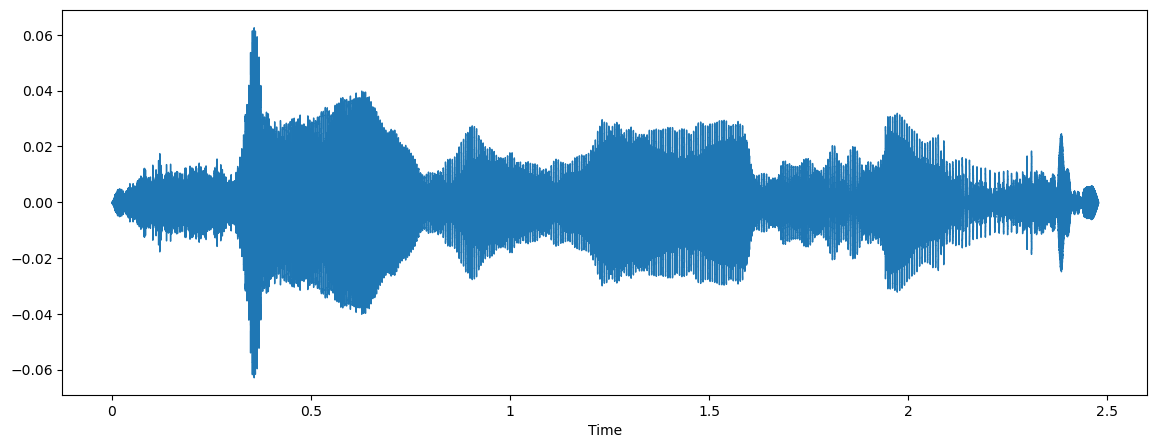

In [42]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][134])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

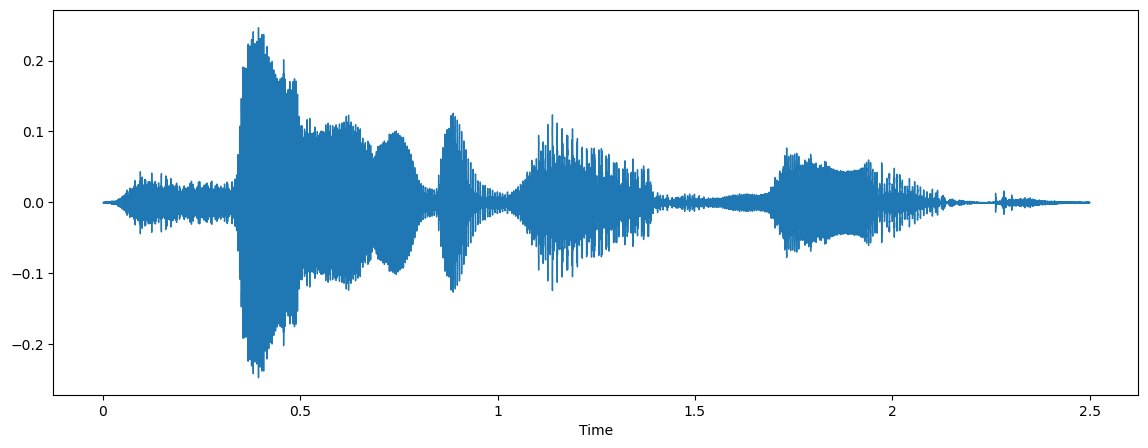

In [43]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][34])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

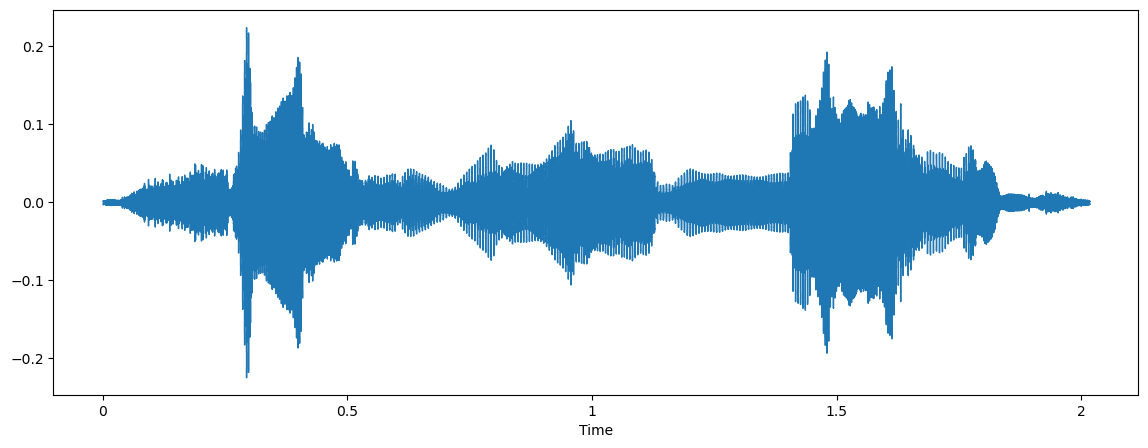

In [44]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

### Specshow

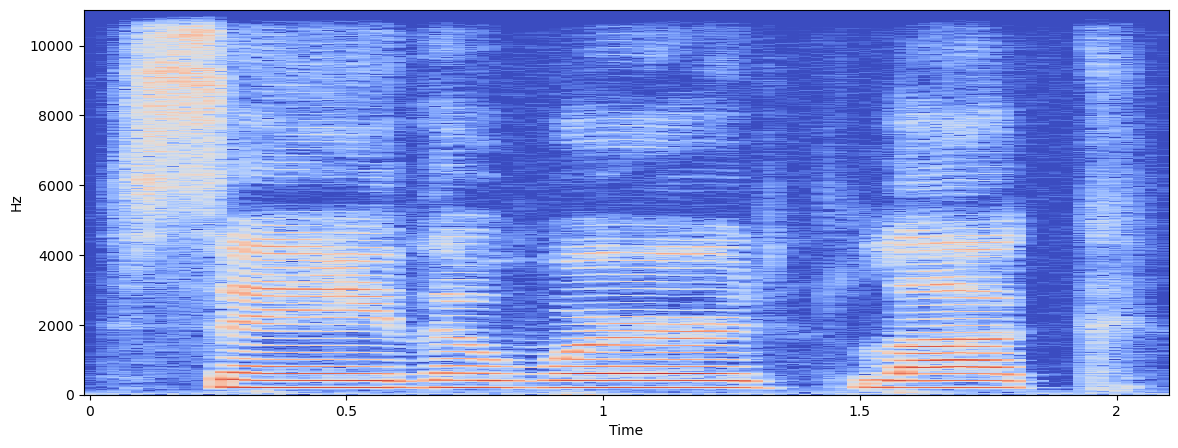

In [46]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][458])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

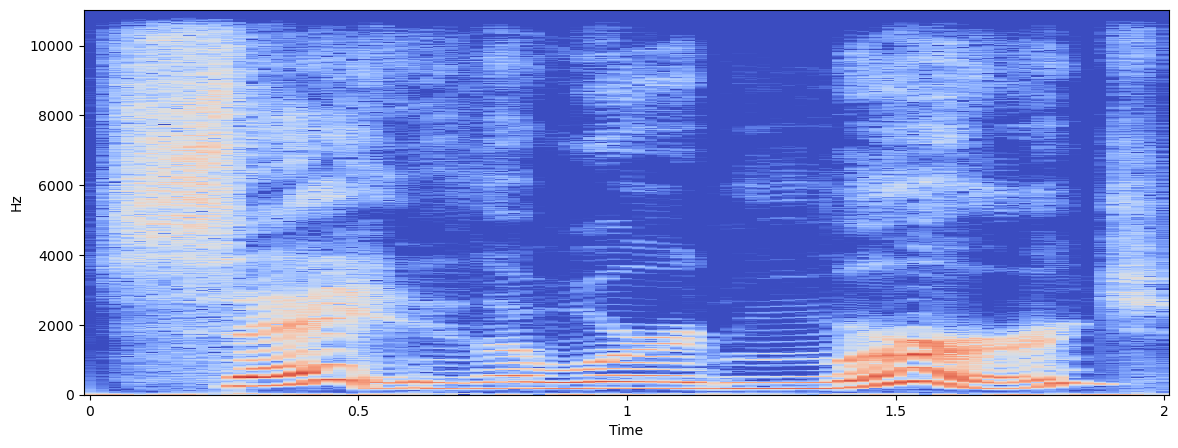

In [47]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

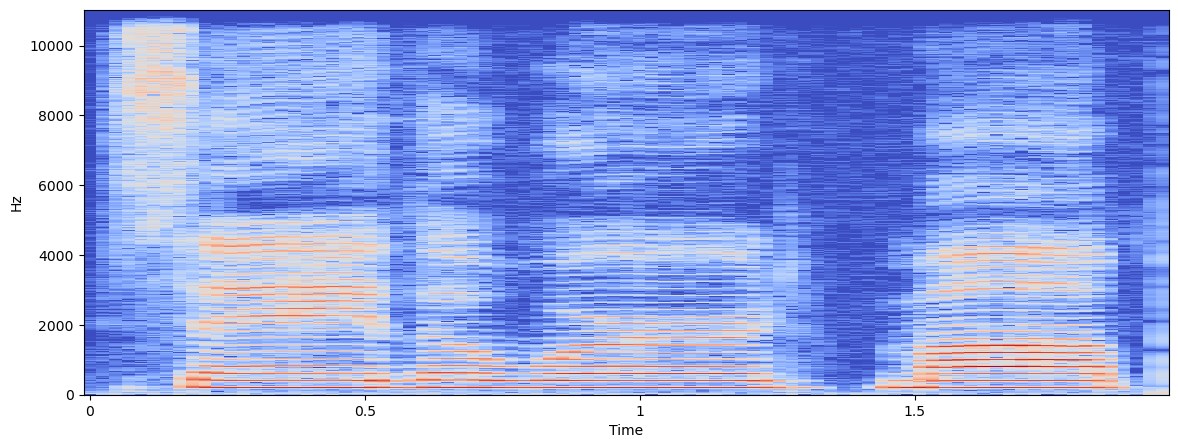

In [48]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

### Noise

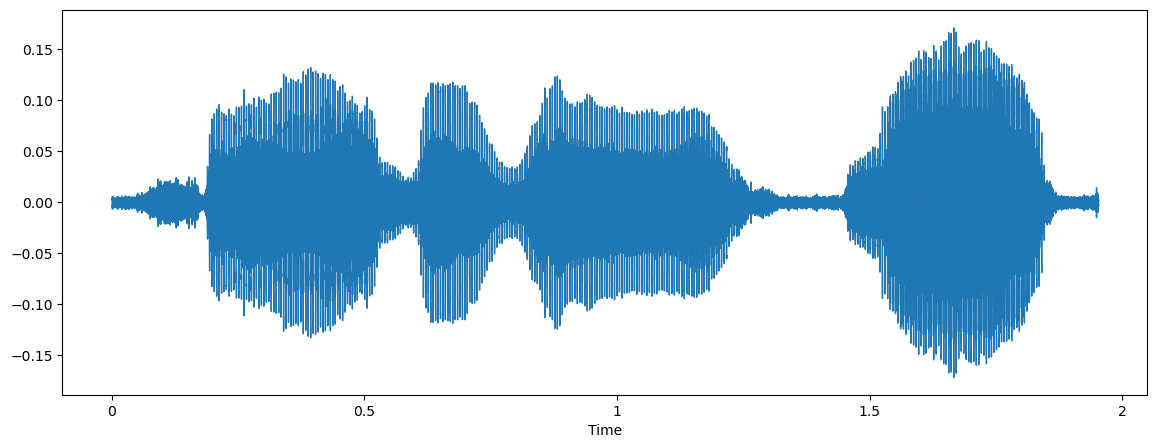

In [50]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

noise_injection = add_noise(audio_speech)

librosa.display.waveshow(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)


### Streching

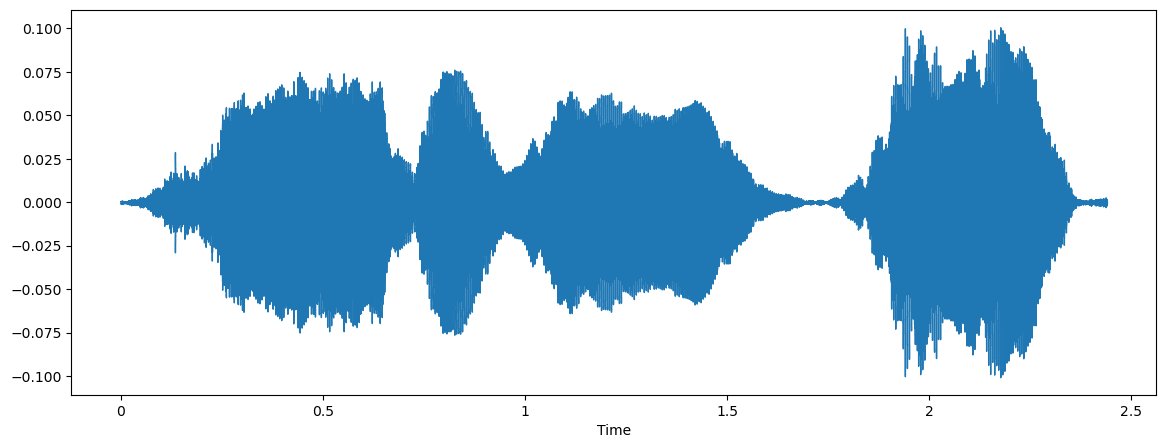

In [52]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stretching_audio = stretch_process(audio_speech)
librosa.display.waveshow(stretching_audio,sr=sample_rate)
Audio(stretching_audio,rate=sample_rate)

### Shifting

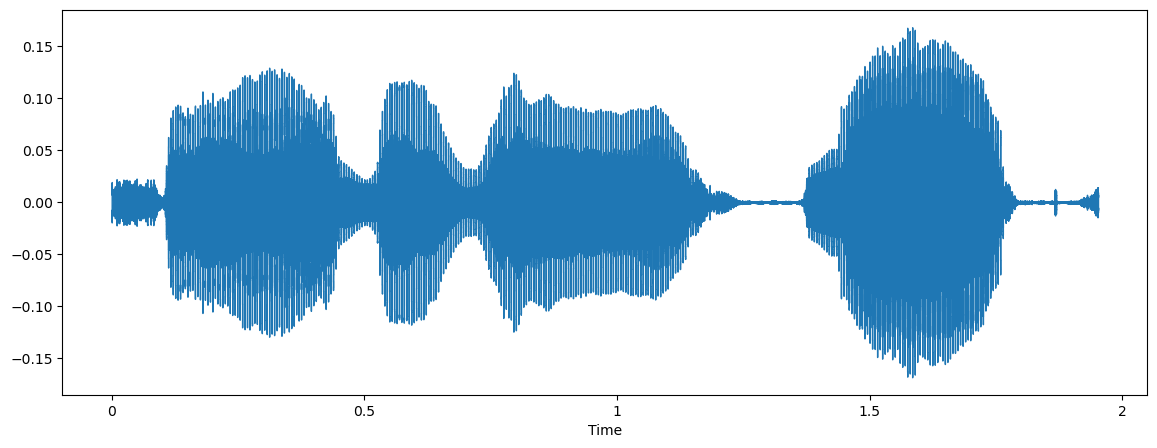

In [54]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

shifting_audio = shift_process(audio_speech)
librosa.display.waveshow(shifting_audio,sr=sample_rate)
Audio(shifting_audio,rate=sample_rate)

### Pitch

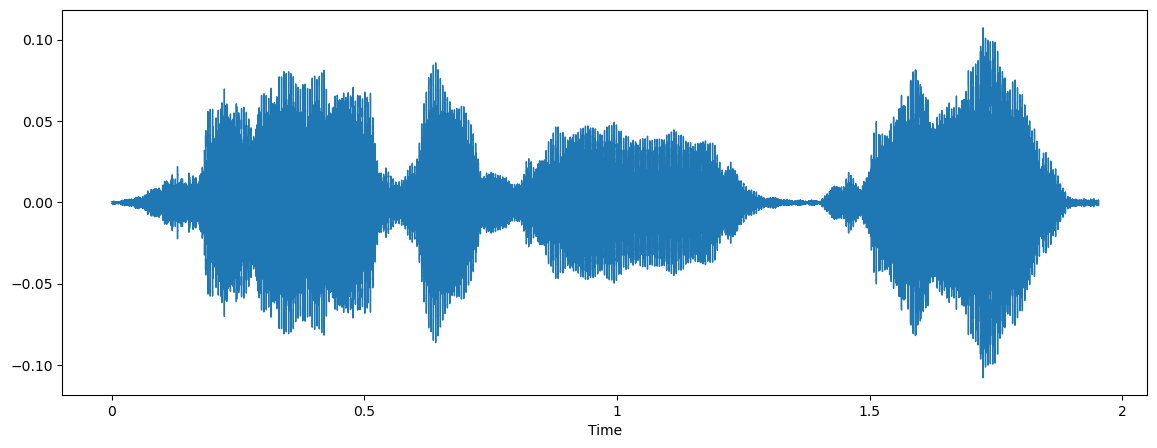

In [56]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

pitch_audio = pitch_process(audio_speech,sample_rate)
librosa.display.waveshow(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

### Same Timeframe Period

(34220,)


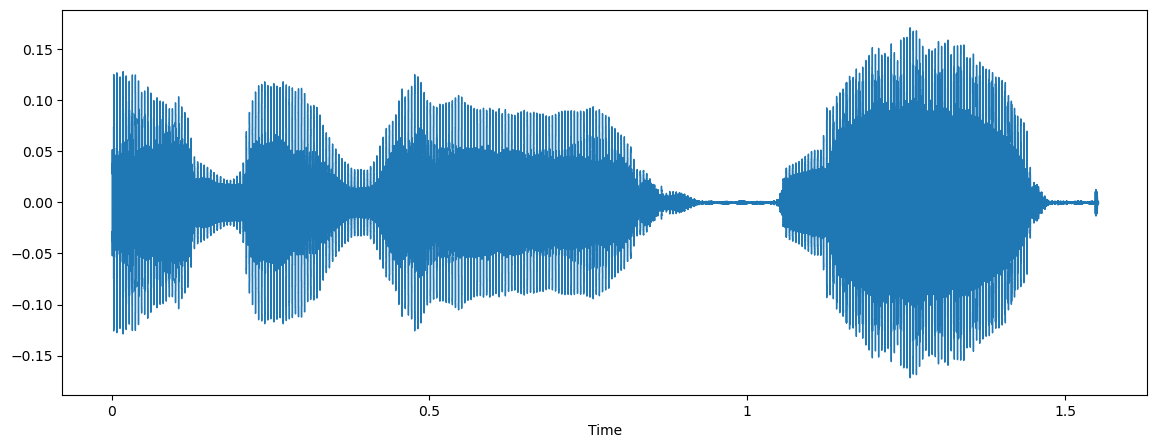

In [58]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000],duration=2.5,offset=0.4)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(30952,)


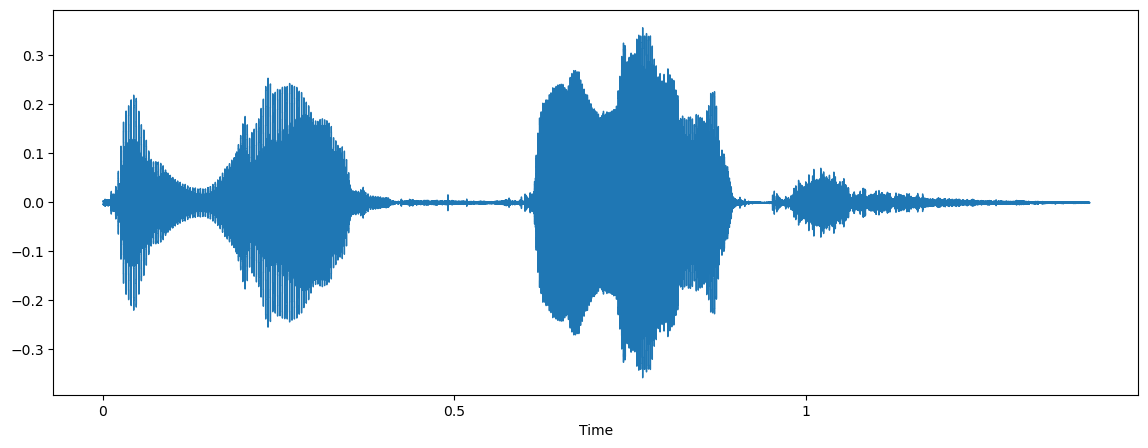

In [59]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][3],duration=2.5,offset=0.6)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(29279,)


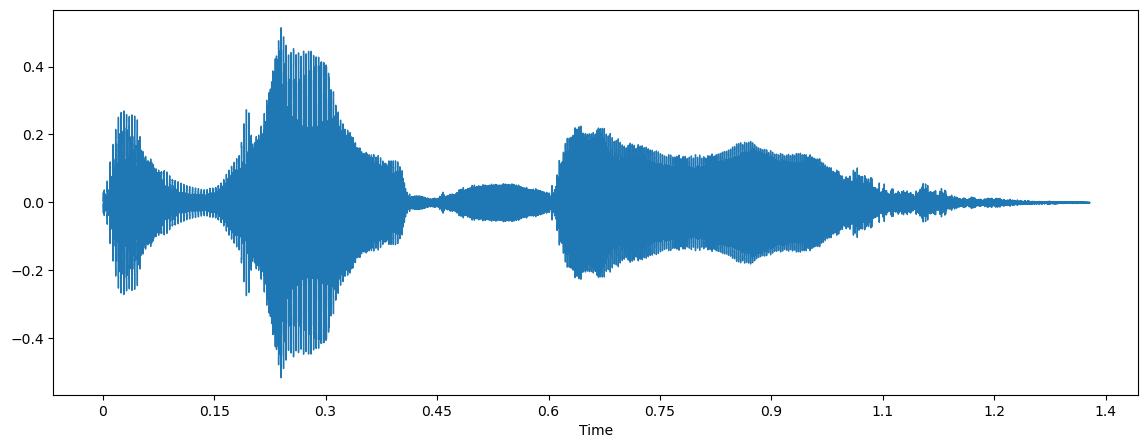

In [60]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][1398],duration=2.5,offset=0.6)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

# Data Processing and Engineering

### Transformation and Exportation

In [63]:
x_Train, y_Train = [],[]

for path,emotion in zip(Main_Wav_Data.WAV,Main_Wav_Data.EMOTION):
    
    features = export_process(path)
    
    for element in features:
        x_Train.append(element)
        y_Train.append(emotion)

In [64]:
print(len(x_Train))
print(len(y_Train))
print(len(Main_Wav_Data.WAV))

8400
8400
2800


In [65]:
print(x_Train[0].shape)

(162,)


In [66]:
print(y_Train[0:5])

['OAF_Fear', 'OAF_Fear', 'OAF_Fear', 'YAF_pleasant_surprised', 'YAF_pleasant_surprised']


In [67]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["EMOTIONS"] = y_Train

New_Features_Wav.to_csv("New_Wav_Set.csv",index=False)

In [68]:
New_Features_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.042004,0.649313,0.737932,0.600529,0.513161,0.428453,0.380382,0.341867,0.374438,0.437359,...,0.000071,0.000042,0.000047,0.000064,0.000039,0.000015,0.000009,0.000008,1.184298e-06,OAF_Fear
1,0.097052,0.694214,0.785286,0.644444,0.569316,0.504593,0.421114,0.396383,0.431753,0.492170,...,0.000111,0.000077,0.000079,0.000100,0.000073,0.000051,0.000041,0.000041,3.484912e-05,OAF_Fear
2,0.050415,0.416717,0.670950,0.799214,0.640525,0.497779,0.415153,0.363440,0.335425,0.348486,...,0.000041,0.000023,0.000012,0.000011,0.000013,0.000019,0.000006,0.000002,1.162207e-07,OAF_Fear
3,0.168774,0.604516,0.609755,0.601484,0.570800,0.617896,0.611451,0.632914,0.661840,0.651224,...,0.009362,0.006915,0.003503,0.002079,0.001829,0.000776,0.000564,0.000300,2.992979e-05,YAF_pleasant_surprised
4,0.178376,0.611289,0.606630,0.593686,0.573702,0.628341,0.609622,0.648248,0.656428,0.672736,...,0.009379,0.006933,0.003504,0.002078,0.001830,0.000785,0.000565,0.000301,3.303964e-05,YAF_pleasant_surprised
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.036098,0.383279,0.356324,0.347537,0.349279,0.409743,0.568887,0.554613,0.480616,0.431315,...,0.000009,0.000007,0.000010,0.000011,0.000013,0.000021,0.000023,0.000008,6.914197e-07,OAF_Sad
8395,0.091732,0.455974,0.436915,0.432931,0.438003,0.467185,0.591783,0.606898,0.518898,0.460299,...,0.000042,0.000039,0.000045,0.000045,0.000047,0.000054,0.000057,0.000041,3.469412e-05,OAF_Sad
8396,0.043096,0.421083,0.371521,0.353591,0.346379,0.320942,0.404068,0.585680,0.526668,0.458567,...,0.000003,0.000002,0.000002,0.000002,0.000003,0.000003,0.000004,0.000004,3.022382e-07,OAF_Sad
8397,0.093237,0.588733,0.553064,0.481190,0.458181,0.448798,0.467241,0.432423,0.459033,0.517197,...,0.000693,0.000916,0.000579,0.000295,0.000162,0.000046,0.000024,0.000013,2.476082e-06,YAF_pleasant_surprised


In [69]:
print(New_Features_Wav["EMOTIONS"].value_counts())

EMOTIONS
OAF_Fear                  600
YAF_pleasant_surprised    600
YAF_fear                  600
OAF_Pleasant_surprise     600
YAF_happy                 600
OAF_disgust               600
YAF_neutral               600
OAF_happy                 600
YAF_sad                   600
OAF_angry                 600
YAF_disgust               600
OAF_neutral               600
OAF_Sad                   600
YAF_angry                 600
Name: count, dtype: int64


### Splitting

In [187]:
#encoder_label = OneHotEncoder()
#encoder_label.fit(emotion_labels)

In [72]:
scaler_data = StandardScaler()

In [73]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav["EMOTIONS"].values

In [74]:
print(X.shape)
print(Y.shape)

(8400, 162)
(8400,)


In [195]:
if Y.ndim > 1:
    Y = np.argmax(Y,axis = 1)

encoder_label = LabelEncoder()
Y = encoder_label.fit_transform(Y)

In [197]:
with open("encoder_label.pkl", "wb") as f:
    pickle.dump(encoder_label,f)

print("LabelEncoder saved as encoder_label.pkl")

LabelEncoder saved as encoder_label.pkl


In [199]:
with open("encoder_label.pkl", "rb") as f:
    loaded_encoder = pickle.load(f)

print("Loaded object type:", type(loaded_encoder))
if hasattr(loaded_encoder, "classes_"):
    print("This is a valid LabelEncoder. Classes:", loaded_encoder.classes_)
else:
    print("Error: encoder_label.pkl is NOT a LabelEncoder!")

Loaded object type: <class 'sklearn.preprocessing._label.LabelEncoder'>
This is a valid LabelEncoder. Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [77]:
print(Y.shape)

(8400, 14)


In [78]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)

In [79]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(7560, 162)
(7560, 14)
(840, 162)
(840, 14)


In [80]:
xTrain = scaler_data.fit_transform(xTrain)
xTest = scaler_data.transform(xTest)


In [81]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162)
(840, 162)


In [82]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)

In [83]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162, 1)
(840, 162, 1)


# Model Structure

In [85]:
Model=Sequential()
Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(xTrain.shape[1], 1)))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(Dropout(0.2))

Model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Flatten())
Model.add(Dense(units=32, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=14, activation='softmax'))

In [86]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [87]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [88]:
Conv1D_Model = Model.fit(xTrain, yTrain, batch_size=64, epochs=10, validation_data=(xTest, yTest), callbacks=[early_stop])

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.2263 - loss: 2.2507 - val_accuracy: 0.6810 - val_loss: 0.9944
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.6338 - loss: 1.1062 - val_accuracy: 0.8512 - val_loss: 0.4902
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.7694 - loss: 0.6900 - val_accuracy: 0.9036 - val_loss: 0.2849
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.8467 - loss: 0.4596 - val_accuracy: 0.9226 - val_loss: 0.2336
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.8738 - loss: 0.3706 - val_accuracy: 0.9464 - val_loss: 0.1737
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - accuracy: 0.9005 - loss: 0.3009 - val_accuracy: 0.9476 - val_loss: 0.1433
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - accuracy: 0.9178 - loss: 0.2472 - val_accuracy: 0.9440 - val_loss: 0.1875
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - accuracy: 0.9334 - loss: 0.199

In [89]:
Model.save("audio_sentiment_model.keras")

<Axes: >

<Figure size 1000x1000 with 0 Axes>

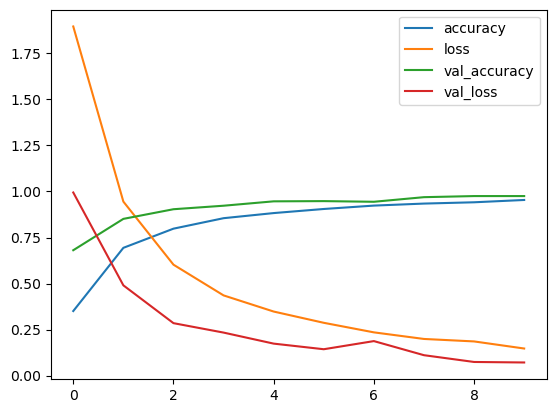

In [90]:
Grap_Data = pd.DataFrame(Conv1D_Model.history)
figure = plt.figure(figsize=(10,10))
Grap_Data.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


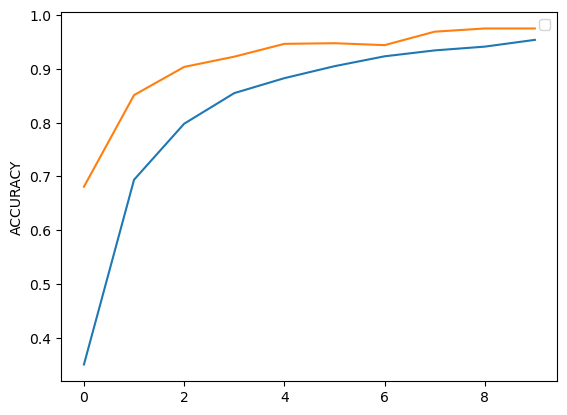

In [91]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


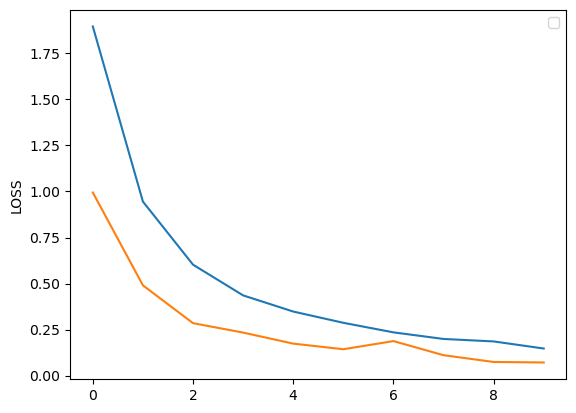

In [92]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()


### Prediction

In [94]:
Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9741 - loss: 0.0726
LOSS:  0.0713
ACCURACY:  0.9750


In [95]:
prediction_test = Model.predict(xTest)
y_prediction = encoder_label.inverse_transform(prediction_test)

yTest = encoder_label.inverse_transform(yTest)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [96]:
print(prediction_test[0:10])

[[3.03087028e-04 2.78286159e-01 2.36469368e-03 1.92633161e-04
  3.15423459e-01 3.98537964e-01 6.74164185e-05 7.12950737e-07
  2.47824239e-04 1.35713867e-06 3.65541439e-07 5.63843641e-05
  1.82668620e-04 4.33526980e-03]
 [6.19197602e-15 4.80779435e-12 2.61183231e-06 1.31659559e-20
  7.44048094e-08 2.74296529e-19 9.99996781e-01 1.39717864e-21
  9.63611786e-16 2.32892122e-17 3.94177153e-19 4.86782028e-07
  3.01818846e-15 4.89391566e-18]
 [6.96777150e-11 1.96124450e-09 9.99883413e-01 1.99029404e-10
  1.15430346e-04 1.45973428e-10 5.05576239e-08 1.05486741e-15
  1.84253113e-09 1.89886019e-12 3.70643100e-12 1.22673111e-06
  3.66878992e-11 7.77061437e-09]
 [3.19366387e-12 2.42372322e-09 4.27027089e-08 2.09482067e-11
  3.22699464e-07 1.65760409e-11 9.85376017e-12 1.21391978e-13
  4.57520341e-11 2.00198677e-14 1.27540892e-12 3.31666638e-06
  5.74660545e-12 9.99996305e-01]
 [4.05052524e-05 9.50941324e-01 1.38474903e-08 9.00812665e-06
  3.48154608e-05 4.84373532e-02 3.84413652e-05 1.72212555e-08


In [97]:
print(y_prediction[0:10])

[['OAF_happy']
 ['OAF_neutral']
 ['OAF_Sad']
 ['YAF_sad']
 ['OAF_Pleasant_surprise']
 ['YAF_happy']
 ['OAF_Pleasant_surprise']
 ['YAF_fear']
 ['OAF_neutral']
 ['YAF_angry']]


In [98]:
print(yTest[0:10])

[['OAF_disgust']
 ['OAF_neutral']
 ['OAF_Sad']
 ['YAF_sad']
 ['OAF_Pleasant_surprise']
 ['YAF_happy']
 ['OAF_Pleasant_surprise']
 ['YAF_fear']
 ['OAF_neutral']
 ['YAF_angry']]


In [99]:
conf_matrix = confusion_matrix(yTest, y_prediction)

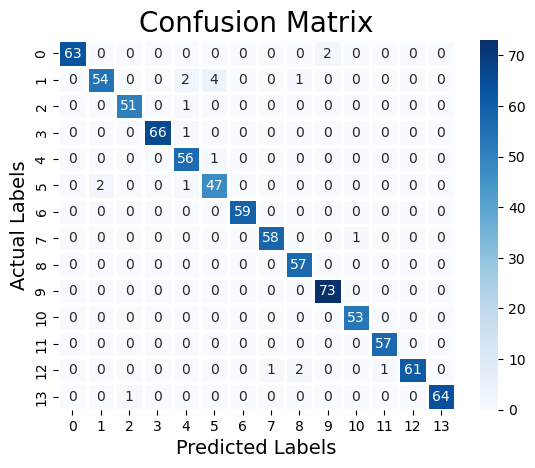

In [100]:
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [101]:
print(classification_report(yTest, y_prediction))

                        precision    recall  f1-score   support

              OAF_Fear       1.00      0.97      0.98        65
 OAF_Pleasant_surprise       0.96      0.89      0.92        61
               OAF_Sad       0.98      0.98      0.98        52
             OAF_angry       1.00      0.99      0.99        67
           OAF_disgust       0.92      0.98      0.95        57
             OAF_happy       0.90      0.94      0.92        50
           OAF_neutral       1.00      1.00      1.00        59
             YAF_angry       0.98      0.98      0.98        59
           YAF_disgust       0.95      1.00      0.97        57
              YAF_fear       0.97      1.00      0.99        73
             YAF_happy       0.98      1.00      0.99        53
           YAF_neutral       0.98      1.00      0.99        57
YAF_pleasant_surprised       1.00      0.94      0.97        65
               YAF_sad       1.00      0.98      0.99        65

              accuracy                

In [102]:
print(accuracy_score(yTest, y_prediction))

0.975


In [201]:
import os
import tensorflow as tf

# Set project path (modify if needed)
project_path = "C:/Users/esther/OneDrive - Tunku Abdul Rahman University College/FYP/Project II"
os.chdir(project_path)

# Load pre-trained model
model_path = os.path.join(os.getcwd(), "audio_sentiment_model.keras")

if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    print("✅ Model loaded successfully!")
    print("🔍 Model expected input shape:", model.input_shape)
else:
    print(f"❌ Error: Model file '{model_path}' not found!")


✅ Model loaded successfully!
🔍 Model expected input shape: (None, 162, 1)


In [203]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Load label encoder
encoder_path = os.path.join(os.getcwd(), "encoder_label.pkl")

if os.path.exists(encoder_path):
    with open(encoder_path, "rb") as f:
        encoder_label = pickle.load(f)
    
    print("✅ Label encoder loaded successfully!")
    print("🔍 Label encoder type:", type(encoder_label))
    
    # Verify if it's a LabelEncoder
    if isinstance(encoder_label, LabelEncoder):
        print("Classes in LabelEncoder:", encoder_label.classes_)
    else:
        print("⚠️ Error: encoder_label.pkl is NOT a LabelEncoder!")
else:
    print("❌ Error: Label encoder file not found!")

✅ Label encoder loaded successfully!
🔍 Label encoder type: <class 'sklearn.preprocessing._label.LabelEncoder'>
Classes in LabelEncoder: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [223]:
import librosa
import numpy as np

def extract_features(audio_path):
    num_mfcc = 40
    num_chroma = 12
    num_mel = 128
    
    data, sample_rate = librosa.load(audio_path, duration=2.5, offset=0.6)

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=num_mfcc).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=data, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    
    features = np.hstack([mfcc, chroma, mel])
    print("Extracted Features Shape BEFORE reshaping:", features.shape)

    expected_shape = 704
    if features.shape[0] > expected_shape:
        features = features[:expected_shape]  # Trim excess
    elif features.shape[0] < expected_shape:
        features = np.pad(features, (0, expected_shape - features.shape[0]), mode='constant')

    print("Extracted Features Shape AFTER reshaping:", features.shape)
    
    return features.reshape(1, 704)

# Test with a sample audio file
audio_path = "C:/Users/esther/OneDrive/Document/YYQX/2025 Feb Audio.wav"  # Change this to your test file
features = extract_features(audio_path)

Extracted Features Shape BEFORE reshaping: (180,)
Extracted Features Shape AFTER reshaping: (704,)


In [225]:
# Ensure features are correctly shaped
print("Feature Shape for Prediction:", features.shape)

# Make prediction
features = features.reshape(1,704)
prediction = model.predict(features)
print("Raw Prediction Output:", prediction)

# Get predicted label index
predicted_label_index = np.argmax(prediction)
print("Predicted Label Index:", predicted_label_index)

# Decode sentiment using label encoder
if isinstance(encoder_label, LabelEncoder):
    sentiment = encoder_label.inverse_transform([predicted_label_index])[0]
    print("Predicted Sentiment:", sentiment)
else:
    print("⚠️ Error: Label encoder is not a valid LabelEncoder!")

Feature Shape for Prediction: (1, 704)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 704, but received input with shape (1, 2816)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 704), dtype=float32)
  • training=False
  • mask=None